In [4]:
!pip install wordcloud
!pip install folium
!pip install xgboost
!pip install yellowbrick

     -------------------------------------- 282.6/282.6 kB 3.5 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as stats
from datetime import datetime as dt

from wordcloud import WordCloud, STOPWORDS

# To visualize the geographical coordinates in the world map
import folium
from folium.plugins import HeatMap

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import tree

from sklearn.feature_selection import RFE

from warnings import filterwarnings
filterwarnings('ignore')

In [53]:
#Olist E-Commerce datasets
customers = pd.read_excel("C:\\Users\\Owner\\OneDrive - Institut Teknologi Bandung\\Semester 8\\Analitika Data\\UAS Andat\\Data\\olist_customers_dataset.xlsx")
geolocation = pd.read_csv("C:\\Users\\Owner\\OneDrive - Institut Teknologi Bandung\\Semester 8\\Analitika Data\\UAS Andat\\Data\\olist_geolocation_dataset.csv")
orderItems = pd.read_csv("C:\\Users\\Owner\\OneDrive - Institut Teknologi Bandung\\Semester 8\\Analitika Data\\UAS Andat\\Data\\olist_order_items_dataset.csv")
payments = pd.read_csv("C:\\Users\\Owner\\OneDrive - Institut Teknologi Bandung\\Semester 8\\Analitika Data\\UAS Andat\\Data\\olist_order_payments_dataset.csv")
orderReviews = pd.read_csv("C:\\Users\\Owner\\OneDrive - Institut Teknologi Bandung\\Semester 8\\Analitika Data\\UAS Andat\\Data\\olist_order_reviews_dataset.csv")
orders = pd.read_csv("C:\\Users\\Owner\\OneDrive - Institut Teknologi Bandung\\Semester 8\\Analitika Data\\UAS Andat\\Data\\olist_orders_dataset.csv")
products = pd.read_csv("C:\\Users\\Owner\\OneDrive - Institut Teknologi Bandung\\Semester 8\\Analitika Data\\UAS Andat\\Data\\olist_products_dataset.csv")
sellers = pd.read_csv("C:\\Users\\Owner\\OneDrive - Institut Teknologi Bandung\\Semester 8\\Analitika Data\\UAS Andat\\Data\\olist_sellers_dataset.csv")
productCategoryTranslation = pd.read_csv("C:\\Users\\Owner\\OneDrive - Institut Teknologi Bandung\\Semester 8\\Analitika Data\\UAS Andat\\Data\\product_category_name_translation.csv")

In [37]:
# Mengathui ukuran dataframe masing-masing dataset
customers.info()
geolocation.info()
orderItems.info()
payments.info()
orderReviews.info()
orders.info()
products.info()
sellers.info()
productCategoryTranslation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  

In [ ]:
## Mengolah data order

In [54]:
# Mengubah data pada dataframe order menjadi dalam bentuk datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders.order_purchase_timestamp)
orders['order_approved_at'] = pd.to_datetime(orders.order_approved_at)
orders['order_delivered_carrier_date'] = pd.to_datetime(orders.order_delivered_carrier_date)
orders['order_delivered_customer_date'] = pd.to_datetime(orders.order_delivered_customer_date)
orders['order_estimated_delivery_date'] = pd.to_datetime(orders.order_estimated_delivery_date)
orders.info() # memeriksa bentuk data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [39]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [35]:
# distinct_values = orders['order_status'].unique()
# distinct_values
distinct_values_counts = orders['order_status'].value_counts()
distinct_values_counts

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [40]:
orders.dropna()['order_status'].value_counts() # Membuang data todak lengkap datanya kosong

delivered    96455
canceled         6
Name: order_status, dtype: int64

In [48]:
orders[orders.isna().any(axis = 1)]['order_status'].value_counts() # memeriksa order staus apa yang memiliki banyak kolom kosong

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered        23
created           5
approved          2
Name: order_status, dtype: int64

In [56]:
# Membuat kolom baru 
orders['purchased_approved'] = (orders.order_approved_at -orders.order_purchase_timestamp).dt.seconds # lama waktu (detik) untuk order di-approve
orders['approved_carrier'] = (orders.order_delivered_carrier_date - orders.order_approved_at).dt.days # lama waktu (hari) untuk order sampai tahap delivery carrier
orders['carrier_delivered'] = (orders.order_delivered_customer_date - orders.order_delivered_carrier_date).dt.days # lama waktu (hari) untuk order dikirimkan ke customer
orders['delivered_estimated'] = (orders.order_estimated_delivery_date - orders.order_delivered_customer_date).dt.days # lama perkiraan waktu (hari) untuk sampai ke customer dari dikirimkan
orders['purchased_delivered'] = (orders.order_delivered_customer_date - orders.order_purchase_timestamp).dt.days  # lama perkiraan waktu (hari) untuk sampai ke customer dari dikirimkan
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,642.0,2.0,6.0,7.0,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,24170.0,0.0,12.0,5.0,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,994.0,0.0,9.0,17.0,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1073.0,3.0,9.0,12.0,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3710.0,0.0,1.0,9.0,2.0


In [57]:
orders.describe(include = np.number) # Memeriksa statistika deskriptif dari data numerik di dataframe orders

,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered
count,99281.000000,97644.000000,96475.000000,96476.000000,96476.000000
mean,14198.031496,2.301749,8.878310,10.876881,12.094086
std,23663.448160,3.560283,8.746088,10.183854,9.551746
min,0.000000,-172.000000,-17.000000,-189.000000,0.000000
25%,755.000000,0.000000,4.000000,6.000000,6.000000
50%,1169.000000,1.000000,7.000000,11.000000,10.000000
75%,17166.000000,3.000000,12.000000,16.000000,15.000000
max,86399.000000,125.000000,205.000000,146.000000,209.000000


In [61]:
# Membuang data yang waktunya kurang dari 0
falsifiedData = orders[orders.approved_carrier < 0].index
orders.drop(index = falsifiedData, inplace = True)

falsifiedData = orders[orders.carrier_delivered < 0].index
orders.drop(index = falsifiedData, inplace = True)

In [62]:
# Pada pengolahan data ini tidak memperhitungkan order atau pesanan yang dibatalkan
canceledIndex = orders.dropna()[orders.order_status == 'canceled'].index
orders.drop(index = canceledIndex, inplace = True)

In [63]:
# Membuang data yang memiliki kolom kosong selain data "delivered" pada "order_satus"
otherThanDelivered = orders[(orders.isna().any(axis = 1)) & (orders.order_status != 'delivered')].index
orders.drop(index = otherThanDelivered, inplace = True)

In [71]:
# Imputasi data dengan nilai rata-rata
approvedAtNull = orders[orders.order_approved_at.isna()].index
orders.loc[approvedAtNull, 'order_approved_at'] = orders.loc[approvedAtNull, 'order_purchase_timestamp'] + pd.Timedelta(seconds = orders.purchased_approved.mean())

In [73]:
# Imputasi data dengan nilai rata-rata
deliveredCarrierNull = orders[orders.order_delivered_carrier_date.isna()].index
orders.loc[deliveredCarrierNull, 'order_delivered_carrier_date'] = orders.loc[deliveredCarrierNull, 'order_approved_at'] + pd.Timedelta(days = orders.approved_carrier.mean())

In [75]:
# Imputasi data dengan nilai rata-rata
deliveredCustomerNull = orders[orders.order_delivered_customer_date.isna()].index
orders.loc[deliveredCustomerNull, 'order_delivered_customer_date'] = orders.loc[deliveredCustomerNull, 'order_delivered_carrier_date'] + pd.Timedelta(days = orders.carrier_delivered.mean())

In [76]:
orders.describe(exclude = np.number)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,95105,95105,95105,95105,95105,95105,95105,95105
unique,95105,95105,1,94591,87320,79235,94311,445
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-06-01 13:39:44,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-02-14 21:09:19,2017-12-20 00:00:00
freq,1,1,95105,3,9,47,3,506
first,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
last,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


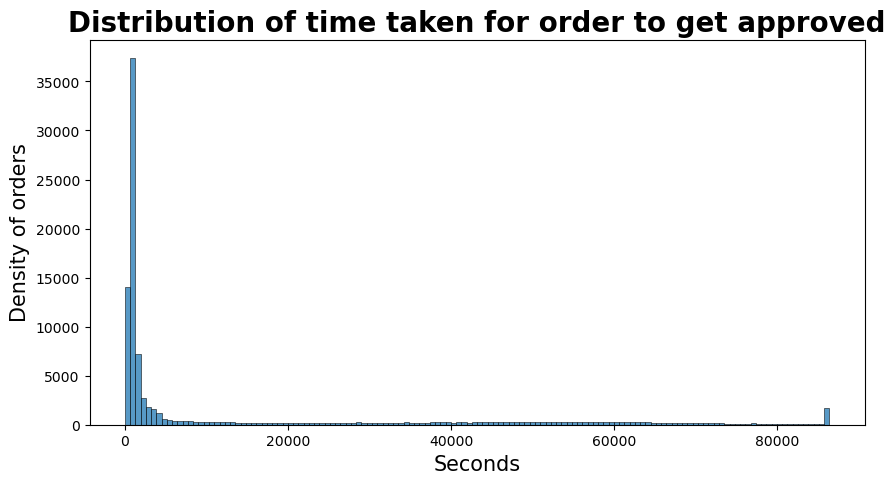

In [77]:
plt.figure(figsize=(10, 5))
sns.histplot(x='purchased_approved', data=orders)
plt.title('Distribution of time taken for order to get approved',fontweight='bold',fontsize=20)
plt.xlabel('Seconds',fontsize=15)
plt.ylabel('Density of orders',fontsize=15)
plt.show()

In [87]:
## Mengolah data customer

In [82]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [84]:
# Mengubah tipe data customer_zip_code_prefix menjadi object
customers['customer_zip_code_prefix'] = customers['customer_zip_code_prefix'].astype(object)

In [89]:
customers.describe()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441,99441,99441
unique,99441,96096,14994,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,22790,sao paulo,SP
freq,1,17,142,15540,41746


In [90]:
# customerCity = customers.customer_city.value_counts(normalize = True)[:10] * 100
# print('The top 10 cities from which customers come are: \n', customerCity)

The top 10 cities from which customers come are: 
 sao paulo                15.627357
rio de janeiro            6.920687
belo horizonte            2.788588
brasilia                  2.142979
curitiba                  1.529550
campinas                  1.452117
porto alegre              1.386752
salvador                  1.251999
guarulhos                 1.195684
sao bernardo do campo     0.943273
Name: customer_city, dtype: float64


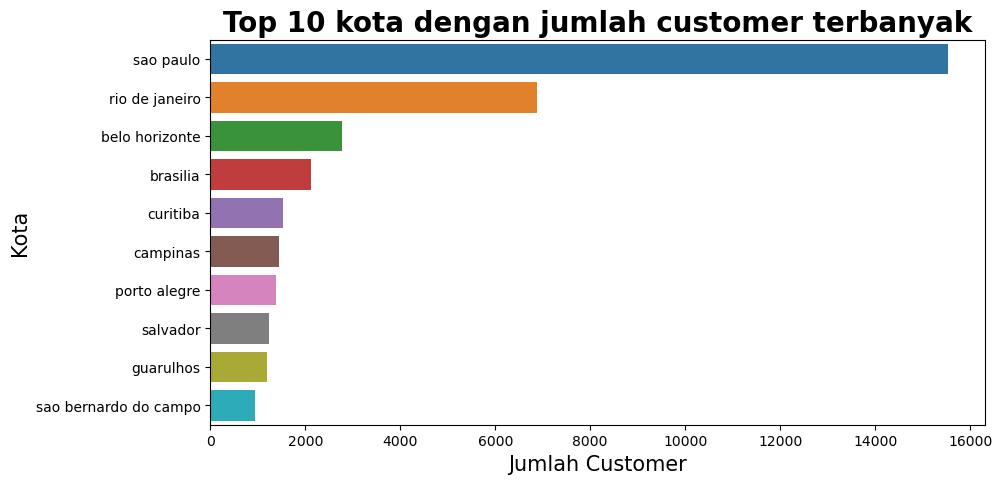

In [95]:
customerCity = customers.customer_city.value_counts(normalize = True)[:10] * 100

plt.figure(figsize=(10, 5))
sns.barplot(y = customers.customer_city.value_counts().index[:10], x = customers.customer_city.value_counts().values[:10])
plt.xlabel('Jumlah Customer',color='black',fontsize=15)
plt.ylabel('Kota',color='black',fontsize=15)
plt.title('Top 10 kota dengan jumlah customer terbanyak',color='black',fontsize=20,fontweight='bold')
plt.show()

In [ ]:
## Mengolah data Geolocation

In [99]:
## Mengolah data orderitems

112650

In [97]:
orderItems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [98]:
# Mengubah format data menjadi tanggal
orderItems['shipping_limit_date'] = pd.to_datetime(orderItems.shipping_limit_date)

In [102]:
# orderItems.isna().sum() / len(orderItems) * 100 #INI BUAT APA DAH?

order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

In [106]:
orderItems.describe(exclude = np.number)

,order_id,product_id,seller_id,shipping_limit_date
count,112650,112650,112650,112650
unique,98666,32951,3095,93318
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23
freq,21,527,2033,21
first,NaN,NaN,NaN,2016-09-19 00:15:34
last,NaN,NaN,NaN,2020-04-09 22:35:08


In [104]:
orderItems.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [107]:
# Mengolah data payment

In [110]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [111]:
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [112]:
payments.describe(include = np.number)

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [113]:
payments.describe(exclude = np.number)

,order_id,payment_type
count,103886,103886
unique,99440,5
top,fa65dad1b0e818e3ccc5cb0e39231352,credit_card
freq,29,76795


In [116]:
payments.payment_type.value_counts()#(normalize = True) * 100

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [117]:
## Mengolah data order review

In [118]:
orderReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [119]:
orderReviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [122]:
orderReviews.dropna(inplace = True)

In [123]:
reviewScore = orderReviews.review_score.value_counts(normalize = True) * 100
reviewScore

5    55.107226
1    18.182742
4    14.564488
3     7.490599
2     4.654945
Name: review_score, dtype: float64

In [124]:
## Mengolah dataframe Products

In [126]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [127]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [128]:
products.dropna(inplace = True)

In [129]:
orderedProducts = products.merge(orderItems, on = 'product_id').merge(productCategoryTranslation, on = 'product_category_name')[['product_id', 'product_category_name_english', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'order_id', 'price', 'freight_value']]
orderedProducts['total_revenue'] = orderedProducts.price + orderedProducts.freight_value
orderedProducts.head()

,product_id,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,price,freight_value,total_revenue
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,10.91,7.39,18.30
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,39.0,346.0,2.0,400.0,27.0,5.0,20.0,048cc42e03ca8d43c729adf6962cb348,16.90,7.78,24.68
2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,39.0,346.0,2.0,400.0,27.0,5.0,20.0,5fa78e91b5cb84b6a8ccc42733f95742,16.90,7.78,24.68
3,0d009643171aee696f4733340bc2fdd0,perfumery,52.0,150.0,1.0,422.0,21.0,16.0,18.0,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,339.00,17.13,356.13
4,0d009643171aee696f4733340bc2fdd0,perfumery,52.0,150.0,1.0,422.0,21.0,16.0,18.0,7b13c77c64a9a956500cbf1a9a23798d,275.00,23.48,298.48


In [130]:
orderedProductsAnalysis = orderedProducts.groupby('product_category_name_english', as_index = False).agg({
                                                        'product_id'                      : 'count',                                                       
                                                        'order_id'                        : 'count',
                                                        'price'                           : 'sum',
                                                        'freight_value'                   : 'sum',
                                                        'total_revenue'                   : 'sum'})
orderedProductsAnalysis.head()

,product_category_name_english,product_id,order_id,price,freight_value,total_revenue
0,agro_industry_and_commerce,212,212,72530.47,5843.60,78374.07
1,air_conditioning,297,297,55024.96,6749.23,61774.19
2,art,209,209,24202.64,4045.17,28247.81
3,arts_and_craftmanship,24,24,1814.01,370.13,2184.14
4,audio,364,364,50688.50,5710.44,56398.94


In [131]:
orderedProductsAnalysis.select_dtypes(include = np.number).describe()

,product_id,order_id,price,freight_value,total_revenue
count,71.000000,71.000000,7.100000e+01,71.000000,7.100000e+01
mean,1563.690141,1563.690141,1.887980e+05,31313.653521,2.201117e+05
std,2606.537422,2606.537422,3.036850e+05,50281.462423,3.515343e+05
min,2.000000,2.000000,2.832900e+02,41.220000,3.245100e+02
25%,93.000000,93.000000,9.171185e+03,1973.205000,1.174393e+04
50%,281.000000,281.000000,4.685688e+04,6749.230000,5.605240e+04
75%,1819.000000,1819.000000,2.029071e+05,35505.620000,2.214684e+05
max,11115.000000,11115.000000,1.258681e+06,204693.040000,1.441248e+06


In [132]:
## Menggabungkan dataset

In [135]:
merged1 = pd.merge(customers, orders, on = 'customer_id')
merged2 = pd.merge(merged1, orderItems, on = 'order_id')
merged3 = pd.merge(merged2, products, on = 'product_id')
#merged4 = pd.merge(merged3, geolocationMean, left_on = 'customer_zip_code_prefix', right_on = 'geolocation_zip_code_prefix')
merged4 = pd.merge(merged3, payments, on = 'order_id').merge(sellers, on = 'seller_id')
merged5 = pd.merge(merged4, productCategoryTranslation, on = 'product_category_name')
merged_all = pd.merge(merged5, orderReviews, on = 'order_id', how = 'left')
merged_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111755 entries, 0 to 111754
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    111755 non-null  object        
 1   customer_unique_id             111755 non-null  object        
 2   customer_zip_code_prefix       111755 non-null  object        
 3   customer_city                  111755 non-null  object        
 4   customer_state                 111755 non-null  object        
 5   order_id                       111755 non-null  object        
 6   order_status                   111755 non-null  object        
 7   order_purchase_timestamp       111755 non-null  datetime64[ns]
 8   order_approved_at              111755 non-null  datetime64[ns]
 9   order_delivered_carrier_date   111755 non-null  datetime64[ns]
 10  order_delivered_customer_date  111755 non-null  datetime64[ns]
 11  

In [137]:
merged = customers.merge(orders, on = 'customer_id').merge(orderItems, on = 'order_id').merge(products, on = 'product_id').merge(payments, on = 'order_id').merge(sellers, on = 'seller_id').merge(productCategoryTranslation, on = 'product_category_name').merge(orderReviews, on = 'order_id', how = 'left')
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111755 entries, 0 to 111754
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    111755 non-null  object        
 1   customer_unique_id             111755 non-null  object        
 2   customer_zip_code_prefix       111755 non-null  object        
 3   customer_city                  111755 non-null  object        
 4   customer_state                 111755 non-null  object        
 5   order_id                       111755 non-null  object        
 6   order_status                   111755 non-null  object        
 7   order_purchase_timestamp       111755 non-null  datetime64[ns]
 8   order_approved_at              111755 non-null  datetime64[ns]
 9   order_delivered_carrier_date   111755 non-null  datetime64[ns]
 10  order_delivered_customer_date  111755 non-null  datetime64[ns]
 11  

In [140]:
merged.drop(columns = ['order_status', 'order_item_id', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'approved_carrier', 'carrier_delivered', 'seller_id', 'shipping_limit_date', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'payment_sequential', 'seller_zip_code_prefix', 'review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'seller_city', 'seller_state'], axis = 1, inplace = True)
merged.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_purchase_timestamp,purchased_approved,delivered_estimated,purchased_delivered,...,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_type,payment_installments,payment_value,product_category_name_english,review_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,997.0,10.0,8.0,...,21.88,8683.0,54.0,64.0,31.0,credit_card,2,146.87,office_furniture,NaN
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,86255.0,20.0,18.0,...,24.90,8683.0,54.0,64.0,31.0,credit_card,1,275.79,office_furniture,NaN
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,86255.0,20.0,18.0,...,24.90,8683.0,54.0,64.0,31.0,credit_card,1,275.79,office_furniture,NaN
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,2017-05-07 20:11:26,7890.0,16.0,18.0,...,15.62,8683.0,54.0,64.0,31.0,credit_card,7,140.61,office_furniture,NaN
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,2018-02-03 19:45:40,9819.0,21.0,25.0,...,30.59,8683.0,54.0,64.0,31.0,credit_card,10,137.58,office_furniture,NaN


In [141]:
final = merged.groupby('customer_unique_id', as_index=False).agg({'customer_zip_code_prefix'      : 'max',
                                                                  'customer_city'                 : 'max',
                                                                  'customer_state'                : 'max',
                                                                  'order_id'                      : 'nunique',
                                                                  'purchased_approved'            : 'mean',
                                                                  'delivered_estimated'           : 'min',
                                                                  'purchased_delivered'           : 'mean',
                                                                  'product_id'                    : 'nunique',
                                                                  'price'                         : 'sum',
                                                                  'freight_value'                 : 'sum',
                                                                  'product_weight_g'              : 'sum',
                                                                  'product_length_cm'             : 'sum',
                                                                  'product_height_cm'             : 'sum',
                                                                  'product_width_cm'              : 'sum',                                                                                             
                                                                  'payment_type'                  : 'max',
                                                                  'payment_installments'          : 'max',
                                                                  'payment_value'                 : 'sum',
                                                                  'review_score'                  : 'mean'})

final.head()

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,purchased_approved,delivered_estimated,purchased_delivered,product_id,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_type,payment_installments,payment_value,review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,1,891.0,4.0,6.0,1,129.90,12.00,1500.0,34.0,7.0,32.0,credit_card,8,141.90,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,1,26057.0,4.0,3.0,1,18.90,8.29,375.0,26.0,11.0,18.0,credit_card,1,27.19,NaN
2,0000f46a3911fa3c0805444483337064,88115,sao jose,SC,1,0.0,1.0,25.0,1,69.00,17.22,1500.0,25.0,50.0,35.0,credit_card,8,86.22,NaN
3,0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,1,1176.0,11.0,20.0,1,25.99,17.63,150.0,19.0,5.0,11.0,credit_card,4,43.62,NaN
4,0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,1,1270.0,7.0,13.0,1,180.00,16.89,6050.0,16.0,3.0,11.0,credit_card,6,196.89,NaN


In [142]:
final.rename(columns = {'order_id' : 'no_of_orders', 'product_id' : 'no_of_products'}, inplace = True)

In [143]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90772 entries, 0 to 90771
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_unique_id        90772 non-null  object 
 1   customer_zip_code_prefix  90772 non-null  int64  
 2   customer_city             90772 non-null  object 
 3   customer_state            90772 non-null  object 
 4   no_of_orders              90772 non-null  int64  
 5   purchased_approved        90760 non-null  float64
 6   delivered_estimated       90764 non-null  float64
 7   purchased_delivered       90764 non-null  float64
 8   no_of_products            90772 non-null  int64  
 9   price                     90772 non-null  float64
 10  freight_value             90772 non-null  float64
 11  product_weight_g          90772 non-null  float64
 12  product_length_cm         90772 non-null  float64
 13  product_height_cm         90772 non-null  float64
 14  produc

In [144]:
final['customer_zip_code_prefix'] = final.customer_zip_code_prefix.astype('object')

In [145]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90772 entries, 0 to 90771
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_unique_id        90772 non-null  object 
 1   customer_zip_code_prefix  90772 non-null  object 
 2   customer_city             90772 non-null  object 
 3   customer_state            90772 non-null  object 
 4   no_of_orders              90772 non-null  int64  
 5   purchased_approved        90760 non-null  float64
 6   delivered_estimated       90764 non-null  float64
 7   purchased_delivered       90764 non-null  float64
 8   no_of_products            90772 non-null  int64  
 9   price                     90772 non-null  float64
 10  freight_value             90772 non-null  float64
 11  product_weight_g          90772 non-null  float64
 12  product_length_cm         90772 non-null  float64
 13  product_height_cm         90772 non-null  float64
 14  produc

In [146]:
## Analisis RFM

In [147]:
recency = merged.groupby('customer_unique_id', as_index=False)['order_purchase_timestamp'].max()
recency.rename(columns={'order_purchase_timestamp':'LastPurchaseDate'},inplace = True)
recency.head()

,customer_unique_id,LastPurchaseDate
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [148]:
recent_date = merged['order_purchase_timestamp'].dt.date.max()
print('The last recent date in the available dataset is: ', recent_date)

The last recent date in the available dataset is:  2018-08-29


In [149]:
recency['Recency'] = recency['LastPurchaseDate'].dt.date.apply(lambda x: (recent_date - x).days)
recency.head()

,customer_unique_id,LastPurchaseDate,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,114
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,537
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,321
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,288


In [150]:
frequency = merged.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index()
frequency.rename(columns={'order_id':'Frequency'},inplace=True)
frequency.head()

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [151]:
monetary = merged.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
monetary.rename(columns={'payment_value':'Monetary'},inplace=True)
monetary.head()

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [152]:
rfm = recency.merge(frequency, on='customer_unique_id')
rfm = rfm.merge(monetary, on='customer_unique_id').drop(columns='LastPurchaseDate')
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89


In [153]:
rfm[rfm.Recency == 0]

,customer_unique_id,Recency,Frequency,Monetary
1470,0421e7a23f21e5d54efed456aedbc513,0,1,119.42
4470,0c6d7218d5f3fa14514fd29865269993,0,1,178.25
12094,21dbe8eabd00b34492a939c540e2b1a7,0,1,14.29
13066,24ac2b4327e25baf39f2119e4228976a,0,1,93.75
32868,5c58de6fb80e93396e2f35642666b693,0,1,1021.92
43304,7a22d14aa3c3599238509ddca4b93b01,0,1,73.10
45395,7febafa06d9d8f232a900a2937f04338,0,1,61.29
62405,afbcfd0b9c5233e7ccc73428526fbb52,0,1,2486.25
64187,b4dcade04bc548b7e3b0243c801f8c26,0,1,106.95
64938,b701bebbdf478f5500348f03aff62121,0,1,33.23


In [154]:
rfm['Recency'] = rfm.Recency.apply(lambda x: 1 if x == 0 else x)

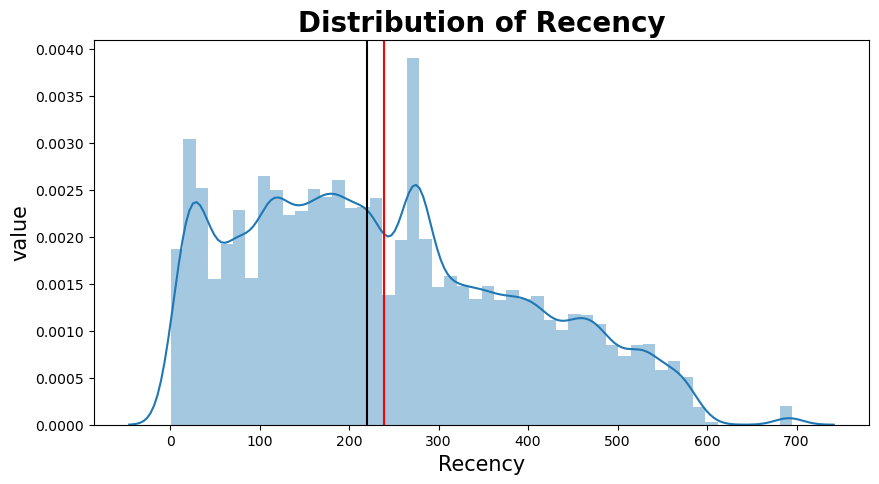

Mean of recency:  238.70065659013792
Median of recency:  220.0
Skewness of recency:  0.43574768122359636


In [155]:
plt.figure(figsize = (10, 5))
sns.distplot(rfm.Recency)
plt.axvline(rfm.Recency.mean(), c = 'red')
plt.axvline(rfm.Recency.median(), c = 'black')
plt.title('Distribution of Recency',fontweight='bold',fontsize=20)
plt.xlabel('Recency',fontsize=15,color='black')
plt.ylabel('value',fontsize=15,color='black')
plt.show()
print('Mean of recency: ', rfm.Recency.mean())
print('Median of recency: ', rfm.Recency.median())
print('Skewness of recency: ', rfm.Recency.skew())

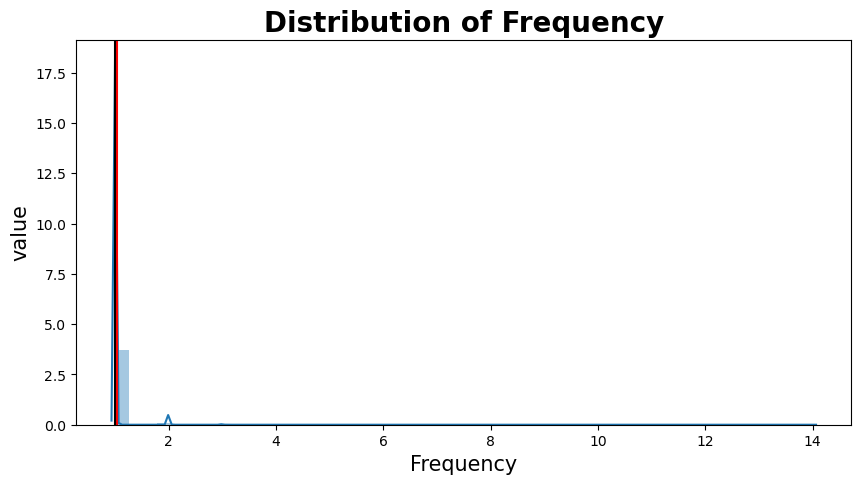

Mean of frequency:  1.0329176398008197
Median of frequency:  1.0
Skewness of frequency:  10.661185172506837


In [156]:
plt.figure(figsize = (10, 5))
sns.distplot(rfm.Frequency)
plt.axvline(rfm.Frequency.mean(), c = 'red')
plt.axvline(rfm.Frequency.median(), c = 'black')
plt.title('Distribution of Frequency',fontweight='bold',fontsize=20)
plt.xlabel('Frequency',fontsize=15,color='black')
plt.ylabel('value',fontsize=15,color='black')
plt.show()
print('Mean of frequency: ', rfm.Frequency.mean())
print('Median of frequency: ', rfm.Frequency.median())
print('Skewness of frequency: ', rfm.Frequency.skew())

In [157]:
Q1 = np.quantile(rfm.Frequency, 0.25)
Q3 = np.quantile(rfm.Frequency, 0.75)
IQR = Q3 - Q1
frequencyDistribution = rfm[~((rfm.Frequency < Q1 - 1.5 * IQR) | (rfm.Frequency > Q3 + 1.5 * IQR))]
frequencyDistribution.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89


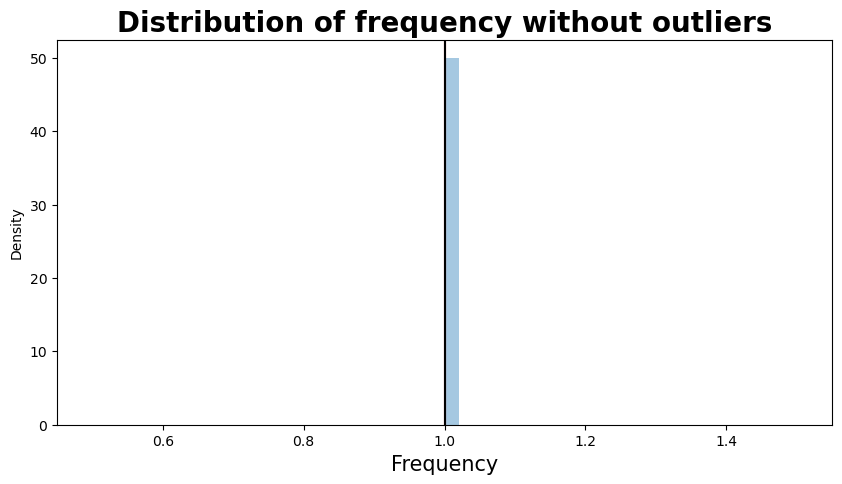

In [158]:
plt.figure(figsize=(10, 5))
sns.distplot(frequencyDistribution.Frequency)
plt.axvline(frequencyDistribution.Frequency.mean(), c = 'red')
plt.axvline(frequencyDistribution.Frequency.median(), c = 'black')
plt.xlabel('Frequency',color='black',fontsize=15)
plt.title('Distribution of frequency without outliers',color='black',fontsize=20,fontweight='bold')
plt.show()

In [159]:
frequencyDistribution.Frequency.describe()

count    88085.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: Frequency, dtype: float64

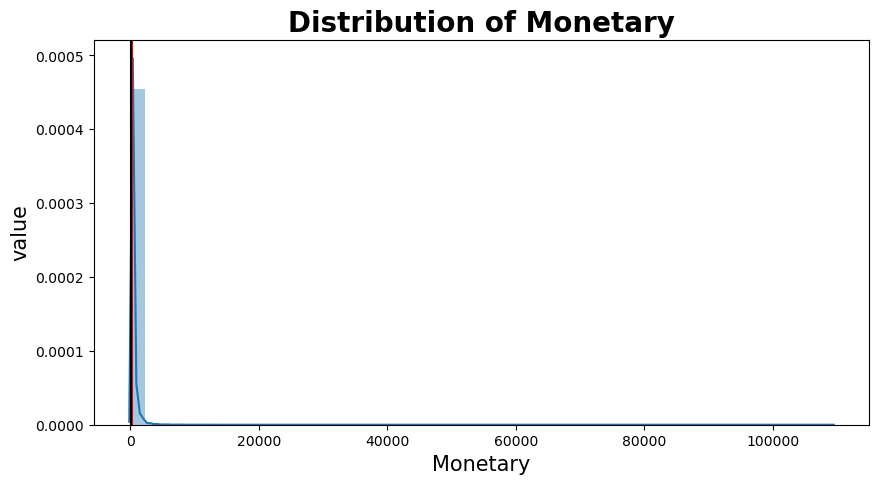

Mean of monetary:  212.2031963601063
Median of monetary:  112.82
Skewness of monetary:  70.52046388757243


In [160]:
plt.figure(figsize = (10, 5))
sns.distplot(rfm.Monetary)
plt.axvline(rfm.Monetary.mean(), c = 'red')
plt.axvline(rfm.Monetary.median(), c = 'black')
plt.title('Distribution of Monetary',fontweight='bold',fontsize=20)
plt.xlabel('Monetary',fontsize=15,color='black')
plt.ylabel('value',fontsize=15,color='black')
plt.show()
print('Mean of monetary: ', rfm.Monetary.mean())
print('Median of monetary: ', rfm.Monetary.median())
print('Skewness of monetary: ', rfm.Monetary.skew())

In [161]:
Q1 = np.quantile(rfm.Monetary, 0.25)
Q3 = np.quantile(rfm.Monetary, 0.75)
IQR = Q3 - Q1
monetaryDistribution = rfm[~((rfm.Monetary < Q1 - 1.5 * IQR) | (rfm.Monetary > Q3 + 1.5 * IQR))]
monetaryDistribution.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89


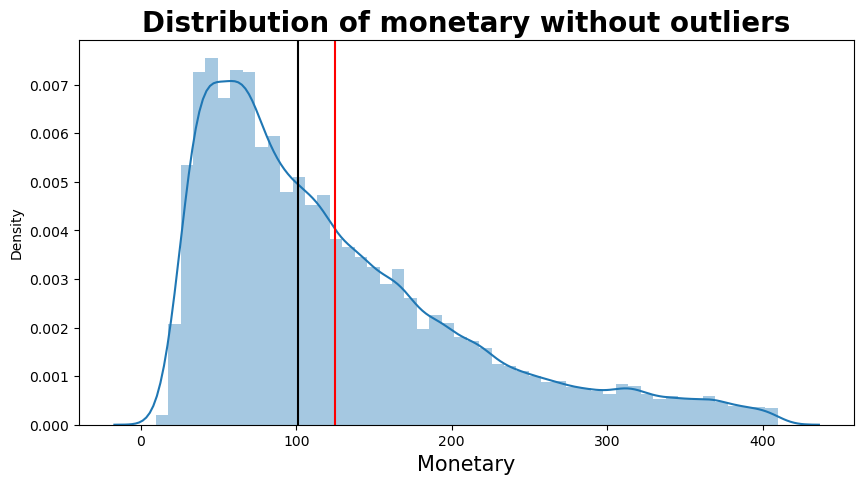

In [162]:
plt.figure(figsize=(10, 5))
sns.distplot(monetaryDistribution.Monetary)
plt.axvline(monetaryDistribution.Monetary.mean(), c = 'red')
plt.axvline(monetaryDistribution.Monetary.median(), c = 'black')
plt.xlabel('Monetary',color='black',fontsize=15)
plt.title('Distribution of monetary without outliers',color='black',fontsize=20,fontweight='bold')
plt.show()

In [163]:
monetaryDistribution.Monetary.describe()

count    81864.000000
mean       124.737285
std         85.101145
min          9.590000
25%         60.000000
50%        101.160000
75%        166.710000
max        409.610000
Name: Monetary, dtype: float64

In [164]:
## Customer Segmentation